# Making code faster

Hello everyone! For this exercise, we will use Numba and Cython to make faster calculations.

* **Numba** is a just-in-time compiler that generates fast machine code from our existing Python code.

* **Cython** allows us to call C functions and declare C types on variables and class attributes, making high-performance code
 ([GitHub](https://github.com/cython/cython/wiki)).



In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## **Numba**:
When trying to enhance our code, some questions can pop out: 

* Will a specific module improve the performance of my code? 



* Is it going to be almost the same? Maybe worse?


  
**Numba** is a good option if our code involves a lot of math, "for loops," and NumPy.

On the other hand, if we are working with Pandas, for example, the code won't be improved

In [4]:
import pandas as pd
dsss = {'Semester week': [2, 3, 4, 5, 6], 'Lecture': ['Hardware', 'File handlng', 'Version control', 'Machine learning', 'Hardware']}

def pandas_function(our_dict):            # Function will not benefit from Numba jit
  df = pd.DataFrame.from_dict(our_dict)   # Numba doesn't know about pd.DataFrame
  return df.sort_values(by= ['Lecture'])  # Or this

print(pandas_function(dsss))

   Semester week           Lecture
1              3      File handlng
0              2          Hardware
4              6          Hardware
3              5  Machine learning
2              4   Version control


In [5]:
%%timeit 
pandas_function

10000000 loops, best of 5: 31.5 ns per loop


In [3]:
!  pip install --upgrade numba # First, we need to upgrade numba to avoid some errors

In [6]:
from numba import jit, njit # jit: numba's dectorator, njit: alias for @jit(nopython=True)

pandas_numba = jit(pandas_function)

In [7]:
%%timeit
pandas_numba

The slowest run took 37.09 times longer than the fastest. This could mean that an intermediate result is being cached.
10000000 loops, best of 5: 31.4 ns per loop


As we see, the performance is almost the same.

Let's check now with the next function:

In [8]:
def movingAverage(x, window=7):
    
    result = np.zeros_like(x)

    for i in range(window, x.size):
        
        result[i] = x[i-window:i].mean()
        
    return result

In [9]:
x = np.linspace(0, 20, 10000)

In [10]:
y = np.sin(x)+np.random.randn(x.size)/4

**1. To Do: use the ```nopython``` mode to run `movingAverage()` in machine code**

Answer:

In [64]:
movingAverageNumba = njit(movingAverage) #TODO

**2. To Do: Calculate the moving average of y. Therefore use the `movingAverage() `function with and without the `nopython `mode. Compare both results using `%time`.**

Answer:

In [65]:
%time movingAverage(y) #TODO

CPU times: user 69.7 ms, sys: 1.95 ms, total: 71.7 ms
Wall time: 73.4 ms


array([0.        , 0.        , 0.        , ..., 0.98530642, 0.93874806,
       0.89134324])

In [66]:
%time movingAverageNumba(y) #TODO

CPU times: user 147 ms, sys: 0 ns, total: 147 ms
Wall time: 150 ms


array([0.        , 0.        , 0.        , ..., 0.98530642, 0.93874806,
       0.89134324])

**3. To Do: the first time using ``movingAverageNumba`` takes longer, why?**

Answer: Because it has to compile the function

**4. To Do: compare both functions using `%timeit`.**

In [67]:
%timeit movingAverage(y) #TODO

10 loops, best of 5: 60 ms per loop


In [68]:
%timeit movingAverageNumba(y) #TODO

1000 loops, best of 5: 253 µs per loop


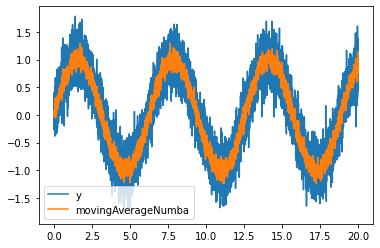

In [14]:
# Plot:
plt.plot(x,y, label='y')
plt.plot(x, movingAverageNumba(y), label='movingAverageNumba')
plt.legend()

## Cython

We can load `cythonmagic` to interactively work with Cython by using:

In [15]:
%load_ext Cython

In [16]:
%%cython
def movingAverage_cython(x, window=7):
    result = np.zeros_like(x)
    for i in range(window, x.size):
        result[i] = x[i-window:i].mean()
        
    return result


Error compiling Cython file:
------------------------------------------------------------
...
def movingAverage_cython(x, window=7):
    result = np.zeros_like(x)
            ^
------------------------------------------------------------

/root/.cache/ipython/cython/_cython_magic_8df45e96104368c5c2d0c532fa7e8d4b.pyx:2:13: undeclared name not builtin: np


**5. To Do: fix the error, use ``timeit``, and plot the results.**

In [17]:
%%cython
import numpy as np
def movingAverage_cython(x, window=7):
    result = np.zeros_like(x)
    for i in range(window, x.size):
        result[i] = x[i-window:i].mean()
    return result

In [18]:
%timeit movingAverage_cython(y)

10 loops, best of 5: 62.5 ms per loop


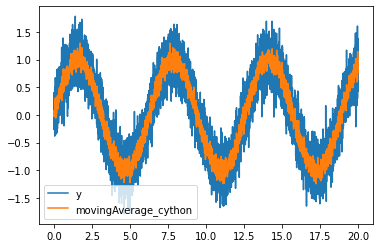

In [19]:
plt.plot(x,y, label= 'y')
plt.plot(x, movingAverage_cython(y), label= 'movingAverage_cython')
plt.legend()

# Profiling
Sometimes we wonder if there is a way to enhance the efficiency of our codes. A way to do it is by running a multiline process to find inefficient functions and operations: the so-called bottlenecks. To perform this multiline process, we need to install  ```line_profiler``` and load it using:

In [20]:
! pip install line_profiler
%load_ext line_profiler

In [21]:
def sum_of_lists(N):
    total = 0
    for i in range(5):
        L = [j ^ (j >> i) for j in range(N)]
        total += sum(L)
    return total

In [56]:
def sum_of_lists_numpy(N):
    total = 0
    for i in range(5):
        L = np.array([j ^ (j >> i) for j in range(N)])
        total += np.sum(L)
    return total


**6. To Do: perform a Line-By-Line profiling for both functions using the magic command ```%lprun```**

Answer:

In [59]:
%lprun -f sum_of_lists sum_of_lists(50) # TODO

In [60]:
%lprun -f sum_of_lists_numpy sum_of_lists_numpy(50) # TODO

**7. To Do: Which function is faster? Why?**

Answer: The function ``sum_of_lists`` is faster. Using ``np.sum()`` takes 20 times longer than ``sum()``. 

In [43]:
%timeit sum_of_lists(50)

10000 loops, best of 5: 33.9 µs per loop


In [46]:
%timeit sum_of_lists_numpy(50)

10000 loops, best of 5: 80.7 µs per loop


**8. Use Numba with ``sum_of_lists_numpy()`` to acelerate calculations.**

Answer

In [78]:
faster_function = njit(sum_of_lists_numpy) # TODO

In [79]:
%timeit faster_function(50)

The slowest run took 242716.72 times longer than the fastest. This could mean that an intermediate result is being cached.
1 loop, best of 5: 1.08 µs per loop


**9. If we run ``faster_function`` with the line-by-line profiler, it does not show the time consumed by each line of the code. Why?**

In [81]:
%lprun -f faster_function faster_function(50) 

Answer: As Numba translates our code into fast machine code, it is complicated for a profiler to evaluate a specific line of the code. 

## Working with inefficient functions: 

In [ ]:
from skimage import data, color
from skimage.transform import resize
from PIL import Image

In [ ]:
imgs = np.uint8(data.lfw_subset()*255)

In [ ]:
def res_skimage(imgs):
    new_size = (imgs[1].shape[0]//2, imgs[1].shape[1]//2)
    res_im = []
    for im in imgs:
        image_resized = resize(im, new_size, anti_aliasing=True) 
        res_im.append(image_resized)
    return np.asarray(res_im)

In [ ]:
%time res_im_ski = res_skimage(imgs)

CPU times: user 287 ms, sys: 225 ms, total: 511 ms
Wall time: 285 ms


Text(0.5, 1.0, 'Resized')

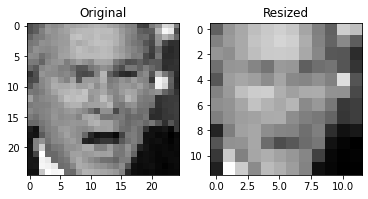

In [ ]:
plt.subplot(1,2,1); plt.imshow(imgs[0], cmap='gray'); plt.title('Original')
plt.subplot(1,2,2); plt.imshow(res_im_ski[0], cmap='gray'); plt.title('Resized')

**10. To Do: perform a Line-By-Line profiling, find the bottleneck and fix it using a faster function. Plot the results.**

Answer:

In [ ]:
%lprun -f res_skimage res_skimage(imgs) # Line-By-Line profiling

From the results: 
function ``resize()`` takes 99.7% of the time: approximately 428,2 ms out of 429,6ms.

We can use Pillow to perform the same operation but faster:

In [ ]:
def res_pil(imgs):
    new_size = (imgs[1].shape[0]//2, imgs[1].shape[1]//2)
    res_im = []
    for im in imgs:
        im2 = Image.fromarray(im, 'L')
        image_resized = im2.resize(new_size)
        res_im.append(image_resized)
    return res_im

In [ ]:
%time res_im_pil = res_pil(imgs)

CPU times: user 9.35 ms, sys: 1.03 ms, total: 10.4 ms
Wall time: 12.6 ms


In [ ]:
%lprun -f res_pil res_pil(imgs)

Now, the time consumed was distributed between reading each image and resizing them 54,9% (9,7 ms) and 42,6% (7,6 ms), respectively. 

Text(0.5, 1.0, 'Resized Pillow')

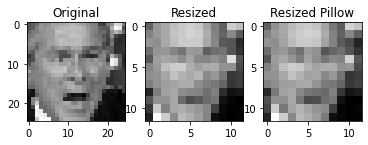

In [ ]:
plt.subplot(1,3,1); plt.imshow(imgs[0], cmap='gray'); plt.title('Original')
plt.subplot(1,3,2); plt.imshow(res_im_ski[0], cmap='gray'); plt.title('Resized')
plt.subplot(1,3,3); plt.imshow(res_im_pil[0], cmap='gray'); plt.title('Resized Pillow')